In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import os

In [2]:
pwd = os.getcwd()
print(pwd)

e:\research\HEA_transfer_learning\weighted_features


In [3]:
data = pd.read_excel(pwd+"/data/training_data/weighted_features.xlsx")
print("Shape of the dataset is: ", data.shape)

data.head()

Shape of the dataset is:  (111, 102)


,Composition,EquiTibrium conditions,phase_count,PhaseType,binary_1,binary_2,binary_3,binary_4,binary_5,binary_6,...,weighted_form_energy_pa_7,weighted_volume_8,weighted_density_8,weighted_form_energy_pa_8,weighted_volume_9,weighted_density_9,weighted_form_energy_pa_9,weighted_volume_10,weighted_density_10,weighted_form_energy_pa_10
0,Al0.25MoNbTiV,AC,s,BCC,Al-Ti,Al-Mo,Al-Nb,Al-V,Mo-Nb,Mo-V,...,0.004675,1.775342,0.412396,0.005027,1.686080,0.298270,0.006566,3.855443,0.379690,0.038795
1,Al0.5MoNbTiV,AC,S,BCC,Al-Ti,Al-Mo,Al-Nb,Al-V,Mo-Nb,Mo-V,...,0.004170,1.583561,0.367847,0.004484,1.503942,0.266049,0.005857,3.438960,0.338674,0.034604
2,Al0.75MoNbTiV,AC,S,BCC,Al-Ti,Al-Mo,Al-Nb,Al-V,Mo-Nb,Mo-V,...,0.003743,1.421257,0.330146,0.004025,1.349798,0.238781,0.005257,3.086490,0.303962,0.031057
3,Al1.5MoNbTiV,AC,S,BCC,Al-Ti,Al-Mo,Al-Nb,Al-V,Mo-Nb,Mo-V,...,0.002792,1.060070,0.246245,0.003002,1.006771,0.178099,0.003921,2.302114,0.226716,0.023165
4,AlMoNbTiV,AC,s,BCC,Al-Ti,Al-Mo,Al-Nb,Al-V,Mo-Nb,Mo-V,...,0.003378,1.282685,0.297956,0.003632,1.218193,0.215500,0.004744,2.785558,0.274326,0.028029


In [4]:
# Replace lowercase 's' with uppercase 'S'.
data['phase_count'] = data['phase_count'].replace('s', 'S')

In [5]:
X = data.iloc[:, -30:].copy()
#X = X.drop(["volume_6"], axis=1)
feature_names = X.columns
y = data.phase_count.copy()

In [6]:
print(y.unique())

['S' 'M']


In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

scaler = MinMaxScaler()
encoder = LabelEncoder()

In [8]:
X = pd.DataFrame(scaler.fit_transform(X), columns=feature_names)
X

,weighted_volume_1,weighted_density_1,weighted_form_energy_pa_1,weighted_volume_2,weighted_density_2,weighted_form_energy_pa_2,weighted_volume_3,weighted_density_3,weighted_form_energy_pa_3,weighted_volume_4,...,weighted_form_energy_pa_7,weighted_volume_8,weighted_density_8,weighted_form_energy_pa_8,weighted_volume_9,weighted_density_9,weighted_form_energy_pa_9,weighted_volume_10,weighted_density_10,weighted_form_energy_pa_10
0,0.246789,0.029855,0.837661,0.182955,0.072176,0.779161,0.127788,0.110721,0.769998,0.091299,...,0.743470,0.240330,0.548462,0.524178,0.393647,0.496116,0.215829,0.242180,0.434400,0.398977
1,0.450197,0.070041,0.712658,0.356477,0.167540,0.641373,0.235909,0.218515,0.673471,0.230875,...,0.699176,0.202726,0.478521,0.467508,0.343959,0.433124,0.189912,0.211174,0.378784,0.353970
2,0.610471,0.101705,0.614162,0.493203,0.242681,0.532802,0.321103,0.303451,0.597412,0.340854,...,0.661690,0.170902,0.419330,0.419549,0.301907,0.379814,0.167978,0.184933,0.331716,0.315882
3,0.916895,0.162244,0.425852,0.754605,0.386342,0.325230,0.483981,0.465837,0.451999,0.551118,...,0.578269,0.100081,0.287609,0.312821,0.208327,0.261180,0.119168,0.126538,0.226973,0.231120
4,0.737178,0.126738,0.536295,0.601293,0.302085,0.446971,0.388453,0.370598,0.537284,0.427799,...,0.629684,0.143731,0.368794,0.378602,0.266005,0.334299,0.149252,0.162529,0.291530,0.283362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.501529,0.223480,0.807033,0.108311,0.264580,0.827145,0.183421,0.484904,0.722889,0.137956,...,0.728327,0.157138,0.289288,0.381889,0.345654,0.435274,0.190796,0.126538,0.226973,0.231120
107,0.419399,0.184367,0.837393,0.084880,0.214419,0.847554,0.206718,0.546496,0.702398,0.102066,...,0.775860,0.114825,0.227271,0.320826,0.395244,0.498141,0.216662,0.099164,0.177871,0.191385
108,0.304767,0.129774,0.879768,0.052176,0.144408,0.876040,0.228846,0.604993,0.682936,0.051974,...,0.821006,0.055768,0.140713,0.235597,0.442343,0.557850,0.241228,0.060957,0.109339,0.135926
109,0.609512,0.274907,0.767116,0.139118,0.330531,0.800312,0.146001,0.385979,0.755802,0.185142,...,0.651980,0.212770,0.370826,0.462174,0.266005,0.334299,0.149252,0.162529,0.291530,0.283362


In [9]:
X.columns

Index(['weighted_volume_1', 'weighted_density_1', 'weighted_form_energy_pa_1',
       'weighted_volume_2', 'weighted_density_2', 'weighted_form_energy_pa_2',
       'weighted_volume_3', 'weighted_density_3', 'weighted_form_energy_pa_3',
       'weighted_volume_4', 'weighted_density_4', 'weighted_form_energy_pa_4',
       'weighted_volume_5', 'weighted_density_5', 'weighted_form_energy_pa_5',
       'weighted_volume_6', 'weighted_density_6', 'weighted_form_energy_pa_6',
       'weighted_volume_7', 'weighted_density_7', 'weighted_form_energy_pa_7',
       'weighted_volume_8', 'weighted_density_8', 'weighted_form_energy_pa_8',
       'weighted_volume_9', 'weighted_density_9', 'weighted_form_energy_pa_9',
       'weighted_volume_10', 'weighted_density_10',
       'weighted_form_energy_pa_10'],
      dtype='object')

In [10]:
y = pd.Series(encoder.fit_transform(y), name='phase_count')
y

0      1
1      1
2      1
3      1
4      1
      ..
106    0
107    0
108    0
109    1
110    1
Name: phase_count, Length: 111, dtype: int32

In [11]:
encoder.inverse_transform([0,1])

array(['M', 'S'], dtype=object)

In [12]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

np.unique(y_smote, return_counts=True), np.unique(y, return_counts=True)

((array([0, 1]), array([74, 74], dtype=int64)),
 (array([0, 1]), array([37, 74], dtype=int64)))

In [13]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [14]:
np.unique(y_test, return_counts=True), np.unique(y_train, return_counts=True), np.unique(y, return_counts=True)

((array([0, 1]), array([13, 17], dtype=int64)),
 (array([0, 1]), array([61, 57], dtype=int64)),
 (array([0, 1]), array([37, 74], dtype=int64)))

In [15]:
splits = [X_train, X_test, y_train, y_test]
for splt in splits:
    print(splt.shape)

(118, 30)
(30, 30)
(118,)
(30,)


In [16]:
classifiers = {
    "KNeighborsClassifier": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": list(range(1, 31)),
            "weights": ["uniform", "distance"],
            "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
            "leaf_size": list(range(20, 41)),
            "p": [1, 2]
        }
    },
    "DecisionTreeClassifier": {
        "model": DecisionTreeClassifier(),
        "params": {
            "criterion": ["gini", "entropy"],
            "splitter": ["best", "random"],
            "max_depth": [None] + list(range(2, 21)),
            "min_samples_split": range(2, 21),
            "min_samples_leaf": range(1, 21),
            "max_features": [None, "sqrt", "log2"],
        }
    },
    "RandomForestClassifier": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": list(range(50, 301, 50)),
            "criterion": ["gini", "entropy"],
            "max_depth": [None] + list(range(2, 21)),
            "min_samples_split": range(2, 21),
            "min_samples_leaf": range(1, 21),
            "max_features": [None, "auto", "sqrt", "log2"],
        }
    },
    "SVC": {
        "model": SVC(),
        "params": {
            "C": [0.1, 1, 10, 100],
            "kernel": ["linear", "poly", "rbf", "sigmoid"],
            "degree": list(range(2, 6)),
            "gamma": ["scale", "auto"] + list(np.logspace(-4, 1, 6)),
            "coef0": list(np.linspace(-1, 1, 21)),
            "shrinking": [True, False],
            "probability": [True]
        }
    },
    "GaussianNB": {
        "model": GaussianNB(),
        "params": {
            "var_smoothing": list(np.logspace(-12, -3, 10))
        }
    }
}

In [17]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Add this line to your existing imports
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [18]:
best_classifiers = {}
best_params = {}

# Initialize the hyper_param_tuning_results dataframe
hyper_param_tuning_results = pd.DataFrame(columns=["Classifier", "Best CV score", "Accuracy on test set"])

# Perform RandomizedSearchCV for each classifier
for classifier_name, classifier_details in classifiers.items():
    model = classifier_details["model"]
    params = classifier_details["params"]

    rscv = RandomizedSearchCV(
        model, params, n_iter=10, n_jobs=-1, cv=5, verbose=1, random_state=42
    )
    rscv.fit(X_train, y_train)

    best_model = rscv.best_estimator_
    best_classifiers[classifier_name] = best_model
    best_params[classifier_name] = rscv.best_params_
    
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{classifier_name}:")
    print(f"Best CV score: {rscv.best_score_}")
    print(f"Accuracy on test set: {accuracy}")
    print(f"Best parameters: {rscv.best_params_}")
    print("-" * 50)
    
    # Append the results to the hyper_param_tuning_results dataframe
    result = pd.DataFrame(
        {"Classifier": [classifier_name],
         "Best CV score": [rscv.best_score_],
         "Accuracy on test set": [accuracy]
         }
    )
    hyper_param_tuning_results = pd.concat([hyper_param_tuning_results, result], ignore_index=True)

# Print the hyper_param_tuning_results dataframe
hyper_param_tuning_results

Fitting 5 folds for each of 10 candidates, totalling 50 fits
KNeighborsClassifier:
Best CV score: 0.8137681159420289
Accuracy on test set: 0.8
Best parameters: {'weights': 'distance', 'p': 2, 'n_neighbors': 8, 'leaf_size': 21, 'algorithm': 'kd_tree'}
--------------------------------------------------
Fitting 5 folds for each of 10 candidates, totalling 50 fits
DecisionTreeClassifier:
Best CV score: 0.7804347826086956
Accuracy on test set: 0.8
Best parameters: {'splitter': 'best', 'min_samples_split': 14, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'gini'}
--------------------------------------------------
Fitting 5 folds for each of 10 candidates, totalling 50 fits
RandomForestClassifier:
Best CV score: 0.8217391304347826
Accuracy on test set: 0.9
Best parameters: {'n_estimators': 250, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 7, 'criterion': 'gini'}
--------------------------------------------------
Fitting 5 

,Classifier,Best CV score,Accuracy on test set
0,KNeighborsClassifier,0.813768,0.800000
1,DecisionTreeClassifier,0.780435,0.800000
2,RandomForestClassifier,0.821739,0.900000
3,SVC,0.864493,0.766667
4,GaussianNB,0.754348,0.633333


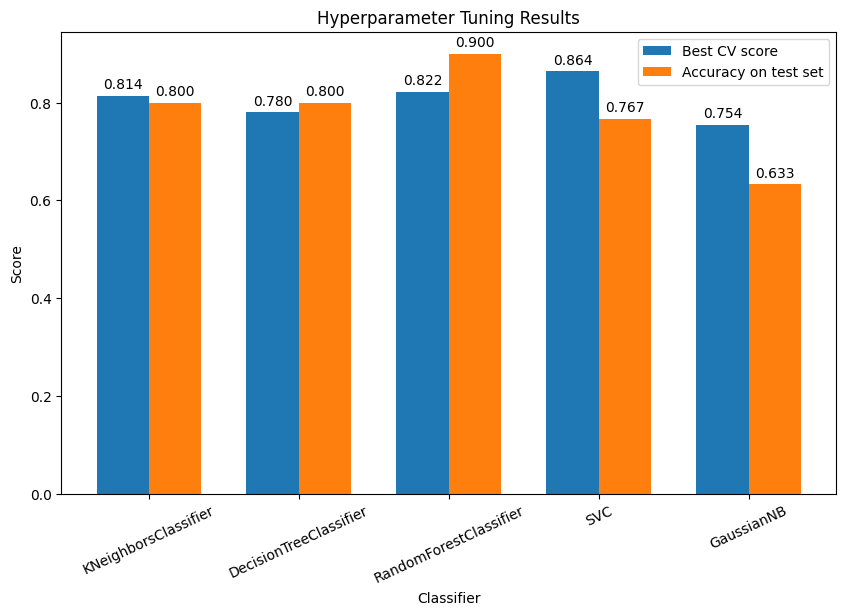

In [19]:
import matplotlib.pyplot as plt

# Set figure size and create subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Define bar width and positions
width = 0.35
x = hyper_param_tuning_results.index

# Plot bars
rects1 = ax.bar(x - width/2, hyper_param_tuning_results["Best CV score"], width, label="Best CV score")
rects2 = ax.bar(x + width/2, hyper_param_tuning_results["Accuracy on test set"], width, label="Accuracy on test set")

# Set x-axis labels and title
ax.set_xticks(x)
ax.set_xticklabels(hyper_param_tuning_results["Classifier"], rotation=25)
ax.set_xlabel("Classifier")
ax.set_ylabel("Score")
ax.set_title("Hyperparameter Tuning Results")

# Add value labels to bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
            f"{height:.3f}",
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 3),
            textcoords="offset points",
            ha="center",
            va="bottom",
        )

autolabel(rects1)
autolabel(rects2)

# Add legend
ax.legend()

#plt.savefig(pwd + '/results/feature_importance/with_vol_6/hyper_param_result_with_vol_6.png', dpi=1000, bbox_inches="tight")
# Show plot
plt.show()

In [20]:
from sklearn.model_selection import cross_val_score

# Create an empty DataFrame to store the cross-validation results
cross_val_results = pd.DataFrame(columns=["Classifier", "Mean Accuracy", "95% Confidence Interval"])

# Perform 5-fold cross-validation using best classifiers and their parameters
for classifier_name, classifier in best_classifiers.items():
    print(f"Performing 5-fold cross-validation for {classifier_name}:")
    clf = classifier.set_params(**best_params[classifier_name])
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    mean_accuracy = scores.mean()
    ci_95 = scores.std() * 2
    print(f"Accuracy: {mean_accuracy} (+/- {ci_95})")
    print("-" * 50)

    # Append the results to the DataFrame using pandas.concat
    result = pd.DataFrame(
        {
            "Classifier": [classifier_name],
            "Mean Accuracy": [mean_accuracy],
            "95% Confidence Interval": [ci_95],
        }
    )
    cross_val_results = pd.concat([cross_val_results, result], ignore_index=True)

# Display the cross_val_results DataFrame
cross_val_results

Performing 5-fold cross-validation for KNeighborsClassifier:
Accuracy: 0.8137681159420289 (+/- 0.13778409576884734)
--------------------------------------------------
Performing 5-fold cross-validation for DecisionTreeClassifier:
Accuracy: 0.7210144927536232 (+/- 0.15191489342925094)
--------------------------------------------------
Performing 5-fold cross-validation for RandomForestClassifier:
Accuracy: 0.8134057971014492 (+/- 0.04359886654055459)
--------------------------------------------------
Performing 5-fold cross-validation for SVC:
Accuracy: 0.8644927536231884 (+/- 0.0633964796466649)
--------------------------------------------------
Performing 5-fold cross-validation for GaussianNB:
Accuracy: 0.7543478260869565 (+/- 0.12349918173453187)
--------------------------------------------------


,Classifier,Mean Accuracy,95% Confidence Interval
0,KNeighborsClassifier,0.813768,0.137784
1,DecisionTreeClassifier,0.721014,0.151915
2,RandomForestClassifier,0.813406,0.043599
3,SVC,0.864493,0.063396
4,GaussianNB,0.754348,0.123499


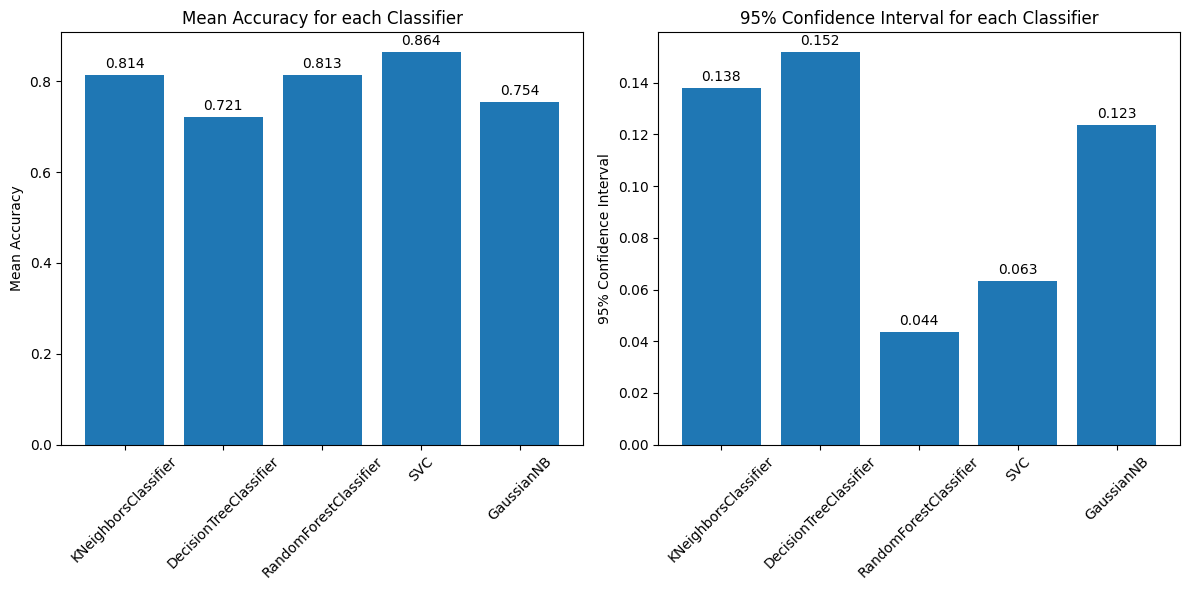

In [21]:
import numpy as np

def add_labels(ax, rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Create an array with the position of each bar along the x-axis
x = np.arange(len(cross_val_results))

# Bar plot for Mean Accuracy
rects1 = axes[0].bar(x, cross_val_results["Mean Accuracy"])
axes[0].set_xticks(x)
axes[0].set_xticklabels(cross_val_results["Classifier"], rotation=45)
axes[0].set_ylabel("Mean Accuracy")
axes[0].set_title("Mean Accuracy for each Classifier")
add_labels(axes[0], rects1)

# Bar plot for 95% Confidence Interval
rects2 = axes[1].bar(x, cross_val_results["95% Confidence Interval"])
axes[1].set_xticks(x)
axes[1].set_xticklabels(cross_val_results["Classifier"], rotation=45)
axes[1].set_ylabel("95% Confidence Interval")
axes[1].set_title("95% Confidence Interval for each Classifier")
add_labels(axes[1], rects2)

# Adjust the layout and show the plot
plt.tight_layout()
#plt.savefig(pwd + '/results/feature_importance/with_vol_6/cross_val_result_with_vol_6.png', dpi=1000, bbox_inches="tight")
plt.show()

#### RF Feature importance

In [22]:
rf_tuned_params = {
    'n_estimators': 250, 
    'min_samples_split': 10, 
    'min_samples_leaf': 2, 
    'max_features': None, 
    'max_depth': 7, 
    'criterion': 'gini',
}

rf = RandomForestClassifier(**rf_tuned_params)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy_score(y_test, y_pred)

0.8666666666666667

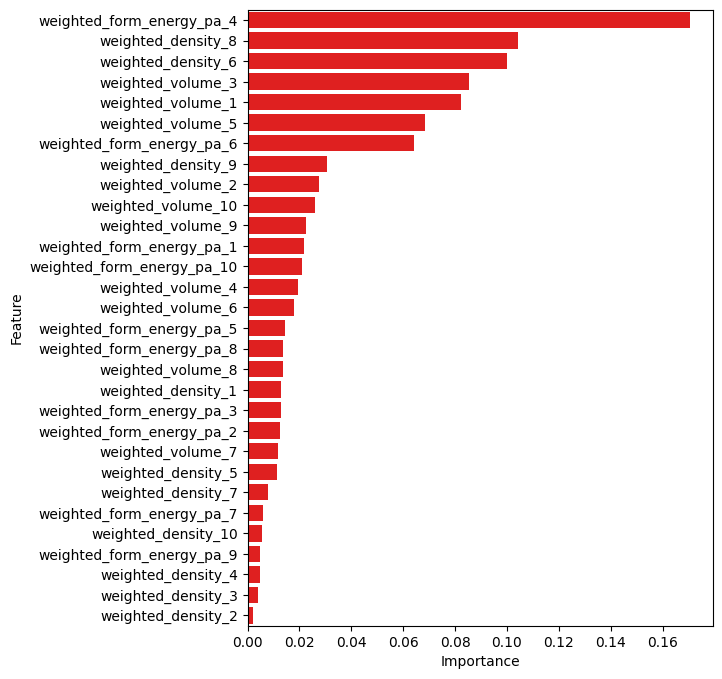

In [23]:
import seaborn as sns

feature_importance_df = pd.DataFrame()
feature_importance_df["Feature"] = X_train.columns
feature_importance_df["Importance"] = rf.feature_importances_

feature_importance_df  = feature_importance_df.sort_values('Importance', ascending=False).reset_index()
plt.style.use('default')
plt.figure(figsize=(6,8))
ax = sns.barplot(x ='Importance', y ='Feature', data= feature_importance_df, color='red')
#plt.savefig(pwd + '/results/feature_importance/with_vol_6/feature_importance_with_vol_6.png', dpi=1000, bbox_inches="tight")
plt.show()

In [24]:
np.sum(feature_importance_df.Importance[:5])

0.5423862187105647

In [25]:
feature_importance_df

,index,Feature,Importance
0,11,weighted_form_energy_pa_4,0.170693
1,22,weighted_density_8,0.104364
2,16,weighted_density_6,0.099910
3,6,weighted_volume_3,0.085306
4,0,weighted_volume_1,0.082114
5,12,weighted_volume_5,0.068519
6,17,weighted_form_energy_pa_6,0.064272
7,25,weighted_density_9,0.030686
8,3,weighted_volume_2,0.027612
9,27,weighted_volume_10,0.025966


#### SVC Feature importance

In [26]:
svc_params = {
    'shrinking': False, 
    'probability': True, 
    'kernel': 'linear', 
    'gamma': 10.0, 
    'degree': 3, 
    'coef0': -0.7, 
    'C': 1
}

# Fit the best SVM model with linear kernel
svc = SVC(**svc_params)
svc.fit(X_train, y_train)

# Calculate feature importances using the coefficients of the support vectors
svc_coef = np.abs(svc.coef_.reshape(-1))
svc_feature_importances = svc_coef / svc_coef.sum()

In [27]:
svc_feature_importances

array([0.01339966, 0.05022056, 0.03064015, 0.00980955, 0.01049016,
       0.02721186, 0.03290693, 0.02109137, 0.03334326, 0.10376487,
       0.00294967, 0.05125445, 0.01998231, 0.0035393 , 0.01724507,
       0.03365012, 0.12647239, 0.02751749, 0.01007068, 0.01095914,
       0.00448292, 0.04730748, 0.11129448, 0.0377905 , 0.00830494,
       0.001582  , 0.01348368, 0.03654946, 0.04203921, 0.06064632])

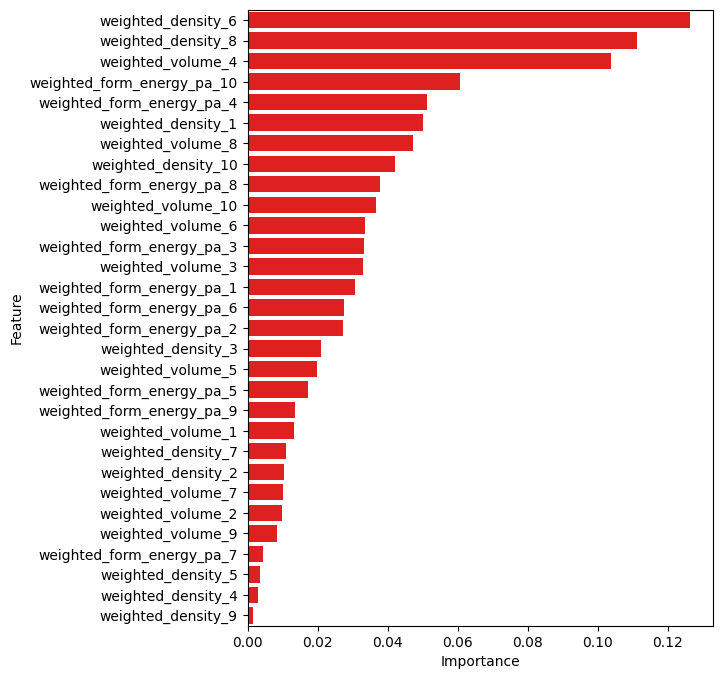

In [28]:
svc_feature_importance_df = pd.DataFrame()
svc_feature_importance_df["Feature"] = X_train.columns
svc_feature_importance_df["Importance"] = svc_feature_importances

svc_feature_importance_df  = svc_feature_importance_df.sort_values('Importance', ascending=False).reset_index()
plt.style.use('default')
plt.figure(figsize=(6,8))
ax = sns.barplot(x ='Importance', y ='Feature', data= svc_feature_importance_df, color='red')
#plt.savefig(pwd + '/results/feature_importance/without_vol_6/svc_feature_importance_without_vol_6.png', dpi=1000, bbox_inches="tight")
plt.show()

In [29]:
from sklearn.metrics import classification_report

y_pred_svc = svc.predict(X_test)
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.65      0.85      0.73        13
           1       0.85      0.65      0.73        17

    accuracy                           0.73        30
   macro avg       0.75      0.75      0.73        30
weighted avg       0.76      0.73      0.73        30



### KNN feature importance

In [30]:
knn_params = {'weights': 'distance', 
              'p': 2, 'n_neighbors': 8, 
              'leaf_size': 21, 
              'algorithm': 'kd_tree'}

knn = KNeighborsClassifier(**knn_params)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=21, n_neighbors=8,
                     weights='distance')

In [31]:
y_pred_knn = knn.predict(X_test)
print(accuracy_score(y_test, y_pred_knn))

0.8


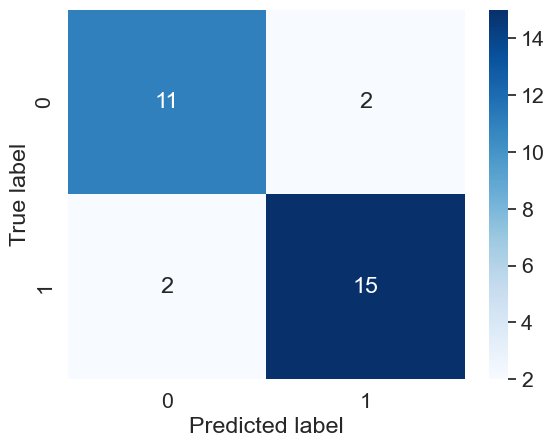

In [32]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

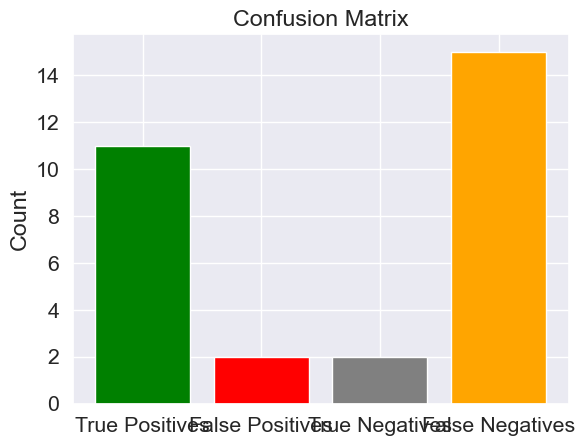

In [35]:
import squarify
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define the labels and colors for the chart
labels = ['True Positives', 'False Positives', 'True Negatives', 'False Negatives']
colors = ['green', 'red', 'gray', 'orange']

# Create a stacked bar chart of the confusion matrix
fig, ax = plt.subplots()
ax.bar(labels, cm.ravel(), color=colors)
ax.set_ylabel('Count')
ax.set_title('Confusion Matrix')
plt.show()

#### Calculating accuracy for diffrent phase counts using KNN

In [ ]:
df = data.copy()

In [ ]:
def count_phases(phase_string):
    count = phase_string.count('+')
    
    if count == 0:
        if phase_string.startswith('2'):
            return 'double'
        elif phase_string.startswith('3'):
            return 'triple'
        elif phase_string.startswith('4'):
            return 'quadruple'
        else:
            return 'single'
    elif count == 1:
        return 'double'
    elif count == 2:
        return 'triple'

df['PhaseCount'] = df['PhaseType'].apply(count_phases)


df.head()

,Composition,EquiTibrium conditions,phase_count,PhaseType,binary_1,binary_2,binary_3,binary_4,binary_5,binary_6,...,weighted_volume_8,weighted_density_8,weighted_form_energy_pa_8,weighted_volume_9,weighted_density_9,weighted_form_energy_pa_9,weighted_volume_10,weighted_density_10,weighted_form_energy_pa_10,PhaseCount
0,Al0.25MoNbTiV,AC,S,BCC,Al-Ti,Al-Mo,Al-Nb,Al-V,Mo-Nb,Mo-V,...,1.775342,0.412396,0.005027,1.686080,0.298270,0.006566,3.855443,0.379690,0.038795,single
1,Al0.5MoNbTiV,AC,S,BCC,Al-Ti,Al-Mo,Al-Nb,Al-V,Mo-Nb,Mo-V,...,1.583561,0.367847,0.004484,1.503942,0.266049,0.005857,3.438960,0.338674,0.034604,single
2,Al0.75MoNbTiV,AC,S,BCC,Al-Ti,Al-Mo,Al-Nb,Al-V,Mo-Nb,Mo-V,...,1.421257,0.330146,0.004025,1.349798,0.238781,0.005257,3.086490,0.303962,0.031057,single
3,Al1.5MoNbTiV,AC,S,BCC,Al-Ti,Al-Mo,Al-Nb,Al-V,Mo-Nb,Mo-V,...,1.060070,0.246245,0.003002,1.006771,0.178099,0.003921,2.302114,0.226716,0.023165,single
4,AlMoNbTiV,AC,S,BCC,Al-Ti,Al-Mo,Al-Nb,Al-V,Mo-Nb,Mo-V,...,1.282685,0.297956,0.003632,1.218193,0.215500,0.004744,2.785558,0.274326,0.028029,single


In [ ]:
# Get the position of the 'PhaseType' column
position = df.columns.get_loc('PhaseType')

# Insert the new column right after the 'PhaseType' column
df.insert(position + 1, 'Phase_Count', df['PhaseCount'])

# Drop the original 'PhaseCount' column
df.drop('PhaseCount', axis=1, inplace=True)

df.head()

,Composition,EquiTibrium conditions,phase_count,PhaseType,Phase_Count,binary_1,binary_2,binary_3,binary_4,binary_5,...,weighted_form_energy_pa_7,weighted_volume_8,weighted_density_8,weighted_form_energy_pa_8,weighted_volume_9,weighted_density_9,weighted_form_energy_pa_9,weighted_volume_10,weighted_density_10,weighted_form_energy_pa_10
0,Al0.25MoNbTiV,AC,S,BCC,single,Al-Ti,Al-Mo,Al-Nb,Al-V,Mo-Nb,...,0.004675,1.775342,0.412396,0.005027,1.686080,0.298270,0.006566,3.855443,0.379690,0.038795
1,Al0.5MoNbTiV,AC,S,BCC,single,Al-Ti,Al-Mo,Al-Nb,Al-V,Mo-Nb,...,0.004170,1.583561,0.367847,0.004484,1.503942,0.266049,0.005857,3.438960,0.338674,0.034604
2,Al0.75MoNbTiV,AC,S,BCC,single,Al-Ti,Al-Mo,Al-Nb,Al-V,Mo-Nb,...,0.003743,1.421257,0.330146,0.004025,1.349798,0.238781,0.005257,3.086490,0.303962,0.031057
3,Al1.5MoNbTiV,AC,S,BCC,single,Al-Ti,Al-Mo,Al-Nb,Al-V,Mo-Nb,...,0.002792,1.060070,0.246245,0.003002,1.006771,0.178099,0.003921,2.302114,0.226716,0.023165
4,AlMoNbTiV,AC,S,BCC,single,Al-Ti,Al-Mo,Al-Nb,Al-V,Mo-Nb,...,0.003378,1.282685,0.297956,0.003632,1.218193,0.215500,0.004744,2.785558,0.274326,0.028029


In [ ]:
np.unique(df.Phase_Count, return_counts=True)

(array(['double', 'single', 'triple'], dtype=object),
 array([34, 74,  3], dtype=int64))

In [ ]:
def accuracy_calculation_for_phase_type(phase_name, model_name, df=df):
    split = df[df["Phase_Count"] == phase_name].copy()
    splitX = split.iloc[:, -30:]
    splitY = split["phase_count"]
    splitY = pd.Series(encoder.fit_transform(splitY), name='phase_count')
    pred = model_name.predict(splitX)
    return print(accuracy_score(splitY, pred))

In [ ]:
phases = ['single', 'double', 'triple']

for phase in phases:
    print(("Accuracy on {} is : ").format(phase)), accuracy_calculation_for_phase_type(phase, knn)

Accuracy on single is : 
0.8513513513513513
Accuracy on double is : 
1.0
Accuracy on triple is : 
1.0


#### Random forest

In [ ]:
for phase in phases:
    print(("Accuracy on {} is : ").format(phase)), accuracy_calculation_for_phase_type(phase, rf)

Accuracy on single is : 
0.9459459459459459
Accuracy on double is : 
1.0
Accuracy on triple is : 
1.0


#### Decision Tree

In [ ]:
dt_params = {'splitter': 'best', 
             'min_samples_split': 13, 
             'min_samples_leaf': 3, 
             'max_features': 'sqrt', 
             'max_depth': 19, 
             'criterion': 'entropy'}

dt = DecisionTreeClassifier(**dt_params)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=19, max_features='sqrt',
                       min_samples_leaf=3, min_samples_split=13)

In [ ]:
for phase in phases:
    print(("Accuracy on {} is : ").format(phase)), accuracy_calculation_for_phase_type(phase, dt)

Accuracy on single is : 
0.972972972972973
Accuracy on double is : 
0.9411764705882353
Accuracy on triple is : 
1.0
